<h2> Question 2

In [24]:
#Importing required libraries
import numpy as np
import pandas as pd
np.random.seed(3116)
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#Scikit learn modules
import xgboost
from sklearn.datasets import make_moons
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [25]:
noise = [1, 0.8, 0.3, 0.1, 0.08, 0.03, 0.01, 0.005, 0.001, 0]
dataset = []

for n in noise:
    #generating data with make_moons function with 100 samples, noise level 'n' and random_state=3116
    features, true_labels = make_moons(n_samples=100, noise = n, random_state=3116)
    #converting the features and labels to pandas dataframe objects
    features = pd.DataFrame(features)
    true_labels = pd.DataFrame(true_labels, columns = ["True_Val"])
    #Concatenating the feature and label dataframes
    #appending the current data to the dataset
    dataset.append(pd.concat([features, true_labels], axis =1))
#concatenating all the data in the dataset into a single dataframe
toyDataset = pd.concat(dataset)


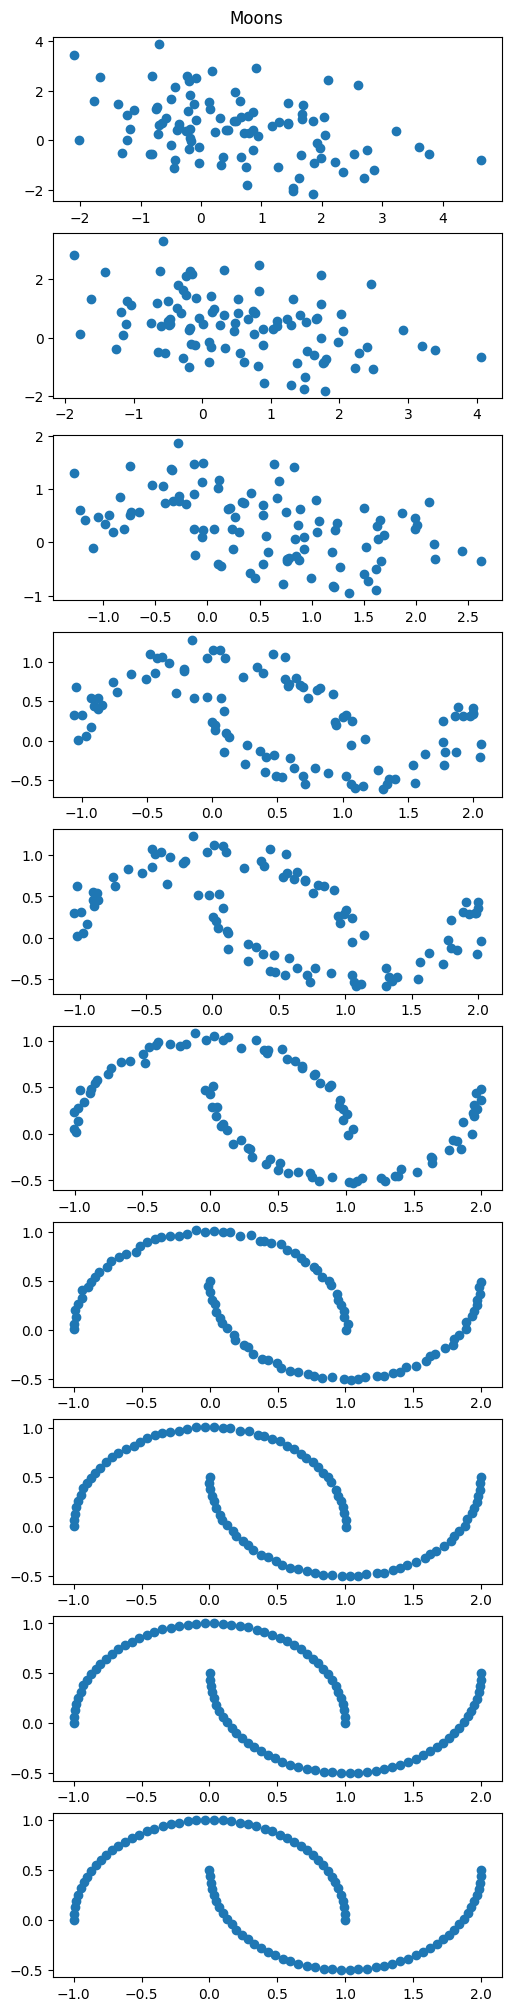

In [26]:
#Visualizing moons randomly selected from toy data for 10 different moons
moon_x = toyDataset.iloc[:, 0] #retrieving the x values of the moon dataset
moon_y = toyDataset.iloc[:, 1] #retrieving the y values of the moon dataset
n = 100
fig, ax = plt.subplots(10, figsize=(5, 20), constrained_layout=True) #creating a subplot with 10 rows, size 5x20 and constrained layout
fig.suptitle('Moons') #setting the title of the figure
for i in range(10):
    #plotting the scatter plot for x and y values in the range i*n to (i+1)*n for the ith moon
    ax[i].scatter(moon_x[i*n : (i+1)*n], moon_y[i*n : (i+1)*n])


In [27]:
def train_test_val_split(df, test_ratio, val_ratio):
    n = df.shape[0] #getting the number of rows in the dataframe
    indices = np.arange(n) #creating an array of indices from 0 to n
    np.random.shuffle(indices) #shuffling the indices
    train_indices = indices[:int((1-test_ratio-val_ratio)*n)] #indices for training set
    val_indices = indices[int((1-test_ratio-val_ratio)*n):int((1-test_ratio)*n)] #indices for validation set
    test_indices = indices[int((1-test_ratio)*n):] #indices for test set
    #retrieving x and y values for the training set
    train_x, train_y = df.iloc[train_indices, :-1], df.iloc[train_indices, -1]
    #retrieving x and y values for the validation set
    val_x, val_y = df.iloc[val_indices, :-1], df.iloc[val_indices, -1]
    #retrieving x and y values for the test set
    test_x, test_y = df.iloc[test_indices, :-1], df.iloc[test_indices, -1]
    return (train_x, train_y), (test_x, test_y), (val_x, val_y)


In [28]:
#splitting the toyDataset into train, test and validation set
(x_train, y_train), (x_test, y_test), (x_val, y_val) = train_test_val_split(toyDataset, 0.15, 0.15)
#creating an XGBoost classifier model with specified hyperparameters
model = xgboost.XGBClassifier(learning_rate = 0.01, max_depth = 2, n_estimators = 100, subsample = 0.5, colsample_bytree = 0.5, eval_metric = 'error', verbosity = 1)
#fitting the model on the training set and using early stopping with 5 rounds and verbosity = True
model.fit(x_train, y_train, early_stopping_rounds=10, eval_set = [(x_val, y_val)], verbose=True)

#Now that the model has been trained, we will see the validation and test accuracy
val_y_hat = model.predict(x_val) #predicting the labels for validation set
val_acc = accuracy_score(y_val, val_y_hat) #calculating the accuracy of the predictions on the validation set

test_y_hat = model.predict(x_test) #predicting the labels for test set
test_acc = accuracy_score(y_test, test_y_hat) #calculating the accuracy of the predictions on the test set

#Printing the accuracy of the model on validation and test sets
print('\n\n*******************************************\n\n')
print("Model Validation Accuracy: {}%".format(np.round(val_acc, 3)))
print("Model Test Accuracy: {}%".format(np.round(test_acc,3)))



[0]	validation_0-error:0.14667
[1]	validation_0-error:0.14667
[2]	validation_0-error:0.14667
[3]	validation_0-error:0.14667
[4]	validation_0-error:0.06667
[5]	validation_0-error:0.06000
[6]	validation_0-error:0.06000
[7]	validation_0-error:0.06000
[8]	validation_0-error:0.06000
[9]	validation_0-error:0.06000
[10]	validation_0-error:0.10000
[11]	validation_0-error:0.10000
[12]	validation_0-error:0.10000
[13]	validation_0-error:0.06000
[14]	validation_0-error:0.07333


*******************************************


Model Validation Accuracy: 0.94%
Model Test Accuracy: 0.88%
